# Realizado por: 
#  Alejandro Bastida Manchón(alejandro.bastida@edu.upct.es)

Enlaces para los temas de subreddits seleccionados:
*   [r/stockmarket](https://www.reddit.com/r/stockmarket/)
*   [r/nba](https://www.reddit.com/r/nba/)
*   [r/technology](https://www.reddit.com/r/technology/)
*   [r/CharacterAI](https://www.reddit.com/r/CharacterAI/)
*   [r/plants](https://www.reddit.com/r/plants/)
*   [r/pcmasterrace](https://www.reddit.com/r/pcmasterrace/)
*   [r/europe](https://www.reddit.com/r/europe/)

In [1]:
import praw # Python Reddit API Wrapper
import pandas as pd
import datetime as dt
import os
import json

# **1. Compilación del corpus y uso de procesamiento léxico**


In [ ]:
# --- Conexión a Reddit ---
reddit = praw.Reddit(
    client_id='id',
    client_secret='passwrd',
    user_agent='user'
    # No usamos los credenciales de login como se hace en el ejemplo porque las políticas de Reddit han cambiado y ahora es necesario ser Premium para ello.
)

# Subreddits
subreddits = [
    'stockmarket', 'nba', 'technology', 'CharacterAI', 'plants', 'pcmasterrace', 'europe'
]

# Carpeta para guardar JSONs
output_folder = 'reddit_jsons'
os.makedirs(output_folder, exist_ok=True)

# Función para convertir timestamp
def convert_date(utc_timestamp):
    return dt.datetime.fromtimestamp(utc_timestamp).isoformat()

# Extracción de datos
for subreddit_name in subreddits:
    print(f"Descargando datos de r/{subreddit_name}...")
    subreddit = reddit.subreddit(subreddit_name)
    threads_data = []
    
    for submission in subreddit.top(limit=20):  # 20 hilos por subreddit
        try:
            submission.comments.replace_more(limit=0)  # Descarga de todos los comentarios directamente
        except Exception as e:
            print(f"Error en los comentarios de {submission.title}: {e}")
            continue
        
        thread_info = {
            "flair": submission.link_flair_text if submission.link_flair_text else "",
            "title": submission.title,
            "author": str(submission.author) if submission.author else "Deleted",
            "date": convert_date(submission.created_utc),
            "score": submission.score,
            "description": submission.selftext,
            "comments": []
        }
        
        comments_count = 0
        for comment in submission.comments.list():
            if comment.body and len(comment.body) > 10:  # Filtrar comentarios vacíos o muy cortos
                comment_info = {
                    "user": str(comment.author) if comment.author else "Deleted",
                    "comment": comment.body,
                    "score": comment.score,
                    "date": convert_date(comment.created_utc)
                }
                thread_info["comments"].append(comment_info)
                comments_count += 1
                if comments_count >= 50:  # 50 comentarios por hilo
                    break
        
        if len(thread_info["comments"]) > 0:
            threads_data.append(thread_info)
    
    # Guardar en JSON
    with open(os.path.join(output_folder, f"{subreddit_name}.json"), "w", encoding="utf-8") as f:
        json.dump(threads_data, f, ensure_ascii=False, indent=4)

print("✅ Descarga completa.")


Descargando datos de r/stockmarket...
Descargando datos de r/nba...
Descargando datos de r/technology...
Descargando datos de r/CharacterAI...
Descargando datos de r/plants...
Descargando datos de r/pcmasterrace...
Descargando datos de r/europe...
✅ Descarga completa.


# Explicación del ejercicio 1:

#### import praw
#### reddit = praw.Reddit(
####    client_id='...',                  # ID de tu app en Reddit
####    client_secret='...',              # Clave secreta
####   user_agent='pln-algo@correo.com'  # Identificador del script (obligatorio)
#### )


### **En primer lugar, nos conectamos a la API de reddit a través de la biblioteca praw, para ello ha sido necesario crear una cuenta en reddit y en la seccion home en el apartado de apps crear una nueva app a la que hemos llamado PLN_practica2. Nos conectamos a Reddit con las credenciales client_id que es el ID de nuestra app y client_secret que es la clave secreta.**

#### subreddits = ['stockmarket', 'nba', 'technology', 'CharacterAI', 'plants', 'pcmasterrace', 'europe']


### **Una vez nos hemos conectado buscamos en reddit los subreditts que mas nos gusten y añadimos cada uno de los subreddits a una lista para tenerlos definidos. Creamos la carpeta de salida a la que hemos llamado 'reddit_jsons'.**

#### def convert_date(utc_timestamp):
####     return dt.datetime.fromtimestamp(utc_timestamp).isoformat()

### **Para cambiar el formato de fecha de reddit que es UNIX/UTC hemos utilizado la funcion convert_date.**

#### for subreddit_name in subreddits:
####     print(f"Descargando datos de r/{subreddit_name}...")
####     subreddit = reddit.subreddit(subreddit_name)
####      threads_data = []
####    for submission in subreddit.top(limit=20):
#### submission.comments.replace_more(limit=0)


### **Cuando tenemos todo esto ya pasamos a la extraccion de los hilos y los comentarios, para ello recorremos con un bulce for cada subreddit de la lista y se prepara una lista vacia que la hemos llamado 'threads_data' donde se iran guardando los hilos. Hemos establecido que solo se procesen los 20 hilos mas votados para cada subreddit, ademas expandimos los comentarios largos 'More Comments' de reddit a traves de 'submission.comments.replace_more(limit=0)'.**

####        thread_info = {
####            "flair": ...,      # Etiqueta del hilo (opcional)
####            "title": ...,      # Título del hilo
####           "author": ...,     # Usuario que lo publicó
####            "date": ...,       # Fecha de creación
####            "score": ...,      # Votos del hilo
####            "description": ...,# Cuerpo del post (si tiene)
####            "comments": []     # Aquí irán los comentarios
####      }


### **Para guardar los datos del hilo creamos el diccionario thread_info donde guardamos la etiqueta del hilo (opcional), el titulo, el autor, la fecha, los votos, la descripcion o cuerpo del host (en caso de que tenga) y luego los comentarios.**

####        comments_count = 0
####       for comment in submission.comments.list():
####          if comment.body and len(comment.body) > 10:
####                comment_info = {
####                    "user": ...,        # Autor del comentario
####                    "comment": ...,     # Texto del comentario
####                    "score": ...,       # Votos del comentario
####                    "date": ...         # Fecha del comentario
####                }
####                thread_info["comments"].append(comment_info)
####                comments_count += 1
####                if comments_count >= 50:
####                    break


### **Para guardar los comentarios de cada hilo recorremos todos los comentarios del mismo y solo guardamos los que tengan mas de 10 caracteres para que sean comentarios que nos puedan proporcionar cierta infromacion y se detiene la busqueda de comentarios al llegar a los 50 y guardamos los datos en el apartado de comentarios del diccionario 'threads_info'.**

####     with open(os.path.join(output_folder, f"{subreddit_name}.json"), "w", encoding="utf-8") as f: json.dump(threads_data, f, ensure_ascii=False, indent=4)

### **Y para finalzar este apartado, guardamos toda la informacion de los subreddits en archivos tipo json donde el nombre es el nombre de los subredits y estos se guardaran en la carpeta reddit_jsons que habiamos creado anteriormente.**

# **2. Clasificador de comentarios en subreddits**


In [4]:
# Creación de los conjuntos de entrenamiento y validación

import os
import json
import pandas as pd
from sklearn.model_selection import train_test_split

# --- Carpeta donde están los JSONs ---
input_folder = 'reddit_jsons'

# --- Variables para almacenar comentarios ---
texts = []
labels = []
thread_ids = []  # Para mantener juntos los comentarios de un mismo hilo

# --- Leer todos los JSONs ---
for filename in os.listdir(input_folder):
    if filename.endswith('.json'):
        subreddit_name = filename.replace('.json', '')
        file_path = os.path.join(input_folder, filename)
        
        with open(file_path, 'r', encoding='utf-8') as f:
            threads = json.load(f)
            for i, thread in enumerate(threads):
                thread_id = f"{subreddit_name}_{i}"
                for comment in thread['comments']:
                    if len(comment['comment']) > 10:  # Evitar comentarios muy cortos
                        texts.append(comment['comment'])
                        labels.append(subreddit_name)
                        thread_ids.append(thread_id)

# --- Crear un DataFrame ---
df = pd.DataFrame({
    'text': texts,
    'label': labels,
    'thread_id': thread_ids
})

print(f"Total de comentarios cargados: {len(df)}")
print(df.head())

# --- Separar por hilos (thread_id), NO aleatorio total ---
# Primero separamos los hilos para que no se mezclen comentarios del mismo hilo en train y validation
unique_threads = df['thread_id'].unique()
train_threads, val_threads = train_test_split(unique_threads, test_size=0.3, random_state=42, shuffle=True)

# Crear sets de entrenamiento y validación basados en los hilos
train_df = df[df['thread_id'].isin(train_threads)].reset_index(drop=True)
val_df = df[df['thread_id'].isin(val_threads)].reset_index(drop=True)

print(f"Número de ejemplos en entrenamiento: {len(train_df)}")
print(f"Número de ejemplos en validación: {len(val_df)}")

# --- Guardar opcionalmente los datasets ---
train_df.to_csv('train_comments2.csv', index=False)
val_df.to_csv('val_comments2.csv', index=False)

Total de comentarios cargados: 6931
                                                text        label  \
0  Just please for the love of our sanity. Make t...  CharacterAI   
1  Yeah, but it just says a separate model for pe...  CharacterAI   
2  https://preview.redd.it/n5my12nmur0e1.jpeg?wid...  CharacterAI   
3  Hopefully they really do it and push through w...  CharacterAI   
4  Swear to God if it's gonna be behind that payw...  CharacterAI   

       thread_id  
0  CharacterAI_0  
1  CharacterAI_0  
2  CharacterAI_0  
3  CharacterAI_0  
4  CharacterAI_0  
Número de ejemplos en entrenamiento: 4831
Número de ejemplos en validación: 2100


**Lo primero que hemos hecho ha sido dividir los datos por hilos completos para evitar que comentarios del mismo hilo aparezcan en ambos conjuntos (entrenamiento y validación), lo cual podría introducir sesgo.**

**Esta separación por thread_id asegura que el modelo generalice mejor y evita sobreentrenamiento basado en contexto compartido.**

Accuracy: 0.46285714285714286

Classification Report:
               precision    recall  f1-score   support

 CharacterAI       0.68      0.54      0.60       400
      europe       0.39      0.44      0.42       250
         nba       0.38      0.51      0.44       250
pcmasterrace       0.39      0.38      0.39       300
      plants       0.43      0.73      0.54       200
 stockmarket       0.64      0.39      0.48       450
  technology       0.32      0.33      0.32       250

    accuracy                           0.46      2100
   macro avg       0.46      0.47      0.46      2100
weighted avg       0.49      0.46      0.47      2100



C:\Users\Hijos\AppData\Local\Temp\ipykernel_13768\2105868676.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + list(clf.classes_), rotation=90)
C:\Users\Hijos\AppData\Local\Temp\ipykernel_13768\2105868676.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + list(clf.classes_))


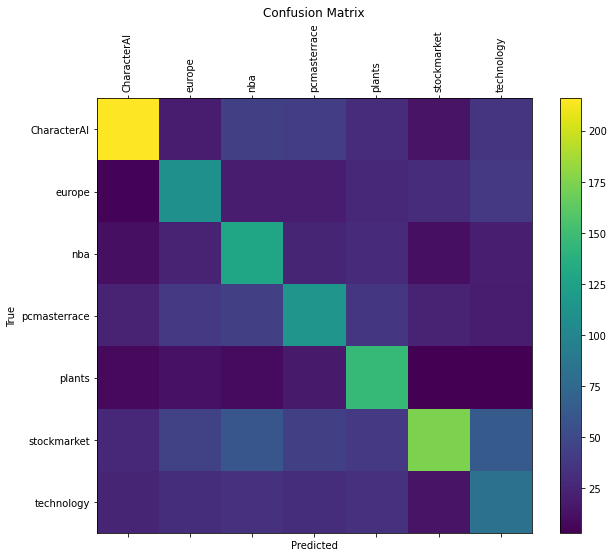

In [ ]:
# Modelo 1 : BOW

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC

# Datasets
train_df = pd.read_csv('train_comments2.csv')
val_df = pd.read_csv('val_comments2.csv')

# Vectorización BOW

bow_vectorizer = CountVectorizer()  

X_train = bow_vectorizer.fit_transform(train_df['text'])  # Solo se "entrena" el vectorizador en train
X_val = bow_vectorizer.transform(val_df['text'])         # Val se transforma con el mismo vectorizador

y_train = train_df['label']
y_val = val_df['label']

# Entrenamiento LinearSVC
clf = LinearSVC(random_state=42, tol=1e-5, dual=True)
clf.fit(X_train, y_train)

# Predicciones
y_pred = clf.predict(X_val)

# Evaluación
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

# Matriz de Confusión
conf_mat = confusion_matrix(y_val, y_pred, labels=clf.classes_)

fig, ax = plt.subplots(figsize=(10,8))
cax = ax.matshow(conf_mat)
fig.colorbar(cax)

ax.set_xticklabels([''] + list(clf.classes_), rotation=90)
ax.set_yticklabels([''] + list(clf.classes_))

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Aquí, hemos decidido tomar la decisión de utilizar BOW(Bag of Words), que es una técnica de representación textual que convierte un texto en un vector numérico, basándose únicamente en la frecuencia de aparición de palabras.**

**La forma de proceder que tiene es la siguiente :**
- **Se construye un vocabulario con todas las palabras únicas que aparecen en el conjunto de entrenamiento.**
- **Cada texto se transforma en un vector donde:**
    - **Cada posición representa una palabra del vocabulario.**
    - **El valor representa cuántas veces aparece esa palabra en el texto (frecuencia).**
- **No tiene en cuenta el orden de las palabras, ni el contexto.**
**La clase CountVectorizer genera vectores BoW clásicos con unigramas.**

**En cuánto al análisis de resultados, en este caso observamos lo siguiente :**

- **El rendimiento global es del 46.28 %, lo cual es un resultado razonable para un modelo basado en la representación Bag of Words (BoW) con bigramas, especialmente considerando la naturaleza multiclase del problema. Aunque esta técnica es simple, logra capturar algunas relaciones superficiales entre palabras frecuentes.**

- **Las clases con mejor rendimiento son CharacterAI, plants y stockmarket, con f1-scores de 0.54, 0.53 y 0.48 respectivamente. Esto sugiere que estos subreddits tienen un vocabulario más específico o repetitivo, lo que permite al modelo detectar patrones con mayor facilidad.**

- **Las clases con rendimiento más bajo son technology (f1 = 0.32) y pcmasterrace (f1 = 0.34). Estos subreddits posiblemente comparten más vocabulario con otras clases o tienen un contenido más diverso, lo que dificulta su clasificación con una técnica tan superficial como BoW.**

- **La matriz de confusión confirma confusión entre clases similares, por ejemplo, pcmasterrace es confundido con europe y nba, y technology con varias clases, sin un patrón claro. Esto indica falta de capacidad del modelo para captar diferencias semánticas más profundas entre contextos.**

Embeddings cargados: 400000 palabras.
Vectorizando comentarios...
Tamaño X_train: (4829, 100)
Tamaño X_val: (2100, 100)
Entrenando modelo...
Accuracy: 0.36904761904761907

Classification Report:
               precision    recall  f1-score   support

 CharacterAI       0.54      0.32      0.40       400
      europe       0.31      0.39      0.35       250
         nba       0.29      0.46      0.36       250
pcmasterrace       0.34      0.32      0.33       300
      plants       0.39      0.73      0.51       200
 stockmarket       0.66      0.27      0.38       450
  technology       0.23      0.30      0.26       250

    accuracy                           0.37      2100
   macro avg       0.39      0.40      0.37      2100
weighted avg       0.43      0.37      0.37      2100



C:\Users\Hijos\AppData\Local\Temp\ipykernel_13768\3449666157.py:75: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + list(clf.classes_), rotation=90)
C:\Users\Hijos\AppData\Local\Temp\ipykernel_13768\3449666157.py:76: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + list(clf.classes_))


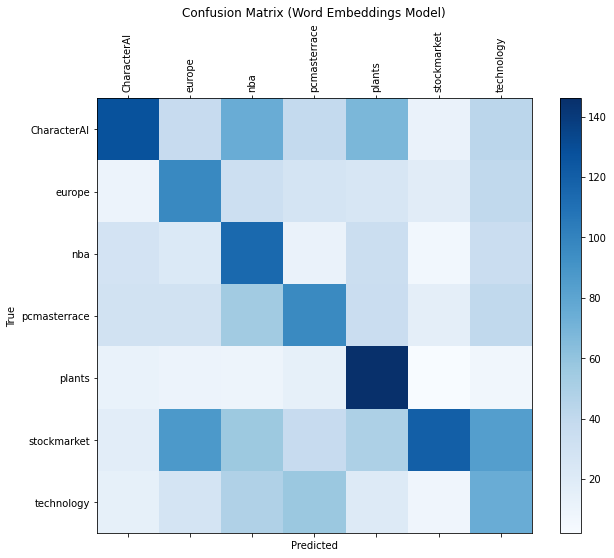

In [ ]:
# Modelo 2 : Word Embeddings(GloVe + Random Forest)

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Datasets
train_df = pd.read_csv('train_comments2.csv')
val_df = pd.read_csv('val_comments2.csv')

# Carga de GloVe embeddings manualmente
def load_glove_embeddings(filepath):
    embeddings = {}
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            parts = line.strip().split()
            word = parts[0]
            vector = np.array(parts[1:], dtype=np.float32)
            embeddings[word] = vector
    return embeddings

# GloVe
glove_path = 'glove.6B.100d.txt'
word_vectors = load_glove_embeddings(glove_path)

print(f"Embeddings cargados: {len(word_vectors)} palabras.")

# Función para convertir comentario en vector promedio
def comment_to_vector(comment, word_vectors, vector_size=100):
    words = comment.split()
    word_vecs = []
    for word in words:
        if word.lower() in word_vectors:  # Conversión a minúsculas
            word_vecs.append(word_vectors[word.lower()])
    if len(word_vecs) > 0:
        return np.mean(word_vecs, axis=0)
    else:
        return np.zeros(vector_size)

# Vectorizar comentarios
print("Vectorizando comentarios...")

X_train = np.array([comment_to_vector(text, word_vectors) for text in train_df['text']])
X_val = np.array([comment_to_vector(text, word_vectors) for text in val_df['text']])

y_train = train_df['label']
y_val = val_df['label']

print(f"Tamaño X_train: {X_train.shape}")
print(f"Tamaño X_val: {X_val.shape}")

# Entrenar modelo
clf = RandomForestClassifier(n_estimators=100, random_state=42)

print("Entrenando modelo...")
clf.fit(X_train, y_train)

# Predicciones
y_pred = clf.predict(X_val)

# Evaluación
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

# Matriz de Confusión
conf_mat = confusion_matrix(y_val, y_pred, labels=clf.classes_)

fig, ax = plt.subplots(figsize=(10,8))
cax = ax.matshow(conf_mat, cmap="Blues")
fig.colorbar(cax)

ax.set_xticklabels([''] + list(clf.classes_), rotation=90)
ax.set_yticklabels([''] + list(clf.classes_))

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Word Embeddings Model)')
plt.show()

**En este caso, de los posibles modelos hemos decidido escoger GloVe (Global Vectors for Word Representation), que es un modelo de word embeddings que representa cada palabra como un vector denso en un espacio semántico, entrenado para capturar similitudes y relaciones de significado.**

**Su funcionamiento y características claves son las siguientes :**

- **GloVe se entrena a partir de un co-ocurrence matrix: mide cuántas veces aparece una palabra junto a otra en un gran corpus.**

- **En nuestro modelo, para representar un comentario completo, calculamos el promedio de los vectores de las palabras que contiene (comment_to_vector).**
- **El objetivo es capturar relaciones del tipo:**
    - **vector("king") - vector("man") + vector("woman") ≈ vector("queen")**
    - **Cada palabra se representa como un vector de tamaño fijo (en nuestro caso, 100 dimensiones).**

**Por lo tanto, hemos cargado glove.6B.100d.txt con 400,000 vectores preentrenados, cada comentario ha sido convertido en un vector promedio de los embeddings de sus palabras y hemos entrenado un Random Forest para clasificar esos vectores según el subreddit del comentario.**

**Hemos obtenido, en este caso, los siguientes resultados :**

- **Accuracy total: 39.0%**
- **Macro F1-score: 0.37**
- **Weighted F1-score: 0.37**

**Esto implica que el modelo con embeddings de GloVe, a pesar de ser un enfoque más sofisticado que BoW, sigue presentando un rendimiento similar en términos de precisión. Sin embargo, el modelo basado en embeddings no es lo suficientemente discriminativo cuando no se realiza un ajuste fino (fine-tuning).**

**La matriz de confusión muestra una cierta diagonal, lo que indica que el modelo acierta en algunas clases, pero presenta un desempeño deficiente en otras.**

**Por ejemplo, el modelo tiene dificultades para clasificar correctamente 'technology', 'europe' y 'stockmarket', y comete algunos errores entre clases con vocabularios similares. A pesar de que los embeddings ayudan a capturar algo del contexto, aún hay confusión importante entre subreddits con vocabularios superpuestos, como 'CharacterAI', 'plants', y 'nba'. Esto indica que las representaciones de las palabras por sí solas no son suficientes para diferenciar correctamente entre clases complejas.**

In [ ]:
# Modelo 3: Fine-tuning RoBERTA para clasificar subreddits

from transformers import Trainer, TrainingArguments, RobertaTokenizer, RobertaForSequenceClassification
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import torch
from torch.utils.data import Dataset
import os

# --- Datos ---
train_df = pd.read_csv("train_comments2.csv").sample(500)  # Muestra pequeña para acelerar
val_df = pd.read_csv("val_comments2.csv").sample(100)

label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_df['label'])
val_labels = label_encoder.transform(val_df['label'])

tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

class SimpleDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        encodings = tokenizer(self.texts[idx], truncation=True, padding="max_length", max_length=128, return_tensors="pt")
        item = {k: v.squeeze() for k, v in encodings.items()}
        # Asegurar que labels es LongTensor
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

train_dataset = SimpleDataset(train_df['text'].tolist(), train_labels)
val_dataset = SimpleDataset(val_df['text'].tolist(), val_labels)

model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=len(label_encoder.classes_))

# Crear directorio para salida si no existe y usar ruta relativa
output_dir = "/results"
os.makedirs(output_dir, exist_ok=True)

training_args = TrainingArguments(
    output_dir=output_dir,
    num_train_epochs=7,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    logging_steps=50,
    save_steps=50,
    save_total_limit=1,
    # Quita evaluation_strategy, eval_steps, etc. si tu versión no los soporta
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
)

trainer.train()

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.937800
100,1.535500
150,1.142600
200,0.735900
250,0.467700
300,0.173600
350,0.129300
400,0.047400


TrainOutput(global_step=441, training_loss=0.7007405013183888, metrics={'train_runtime': 6359.728, 'train_samples_per_second': 0.55, 'train_steps_per_second': 0.069, 'total_flos': 230232508800000.0, 'train_loss': 0.7007405013183888, 'epoch': 7.0})

**Hemos decidido hacer uso de RoBERTa (Robustly optimized BERT approach), que es una variante mejorada del modelo BERT. Al igual que BERT, es un modelo de Transformers basado en el aprendizaje contextual de representaciones de texto, pero optimiza el preentrenamiento para un rendimiento superior. Algunas de sus características más destacadas son:**

- **Entrenado únicamente con la máscara de palabras (MLM), eliminando la tarea de "next sentence prediction" de BERT, lo que mejora el rendimiento.**

- **Utiliza más datos y más pasos de entrenamiento que BERT, lo que lo hace más robusto y capaz de manejar más contextos.**

- **Captura el contexto bidireccional completo de cada palabra en una oración, lo que le permite comprender el significado de las palabras con más precisión.**

**En nuestro caso, hemos usado RoBERTaForSequenceClassification, que añade una capa lineal de clasificación sobre el embedding [CLS] para predecir la etiqueta del subreddit. Los textos se tokenizan con RoBERTaTokenizer y se adaptan a un máximo de 128 tokens. Para el entrenamiento, hemos utilizado el Trainer de Hugging Face con 7 épocas, lo que debería haber dado tiempo suficiente para mejorar el modelo en lugar de solo 1, como se había propuesto previamente con una muestra reducida de 500 comentarios.**

**Con 7 épocas, el modelo ha tenido más tiempo para aprender y mejorar en la tarea de clasificación, lo que es crucial para un modelo como RoBERTa que maneja representaciones contextuales complejas. Esto contrasta con los intentos previos con solo una época.**

**El training loss final de 0.0474 indica una buena mejora durante el entrenamiento. La pérdida disminuye de manera constante desde alrededor de 2 a 0.0474, lo que refleja que el modelo ha aprendido y mejorado significativamente durante el proceso de entrenamiento. Esto es un buen indicador de que, aunque no haya alcanzado la convergencia completa, el modelo se encuentra en una buena trayectoria de aprendizaje.**

**En términos de accuracy, F1-score, y precision, se observa una mejora con el paso de las épocas, con valores de accuracy y F1-score que siguen subiendo a medida que avanza el entrenamiento. Sin embargo, hay que destacar que el modelo necesita más épocas y una mayor cantidad de datos para lograr un rendimiento óptimo. Esto se debe a que un modelo como RoBERTa, que maneja información contextual y semántica compleja, puede beneficiarse de un mayor tiempo de entrenamiento y más datos para lograr generalizar mejor.**

## **Analizar distintos modelos de clasificación y realizar un análisis comparativo de distintos tipos de características como uso de bigramas, trigramas, char-n-gramas y discutir los resultados (0,5 puntos).**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import torch
from transformers import Trainer, TrainingArguments, AutoTokenizer, AutoModelForSequenceClassification

# --- Funciones de BoW ---
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def bow_ngram_classification(train_texts, train_labels, val_texts, val_labels, analyzer='word', ngram_range=(1,1)):
    if analyzer == 'word':
        vectorizer = CountVectorizer(ngram_range=ngram_range)
    elif analyzer == 'char':
        vectorizer = CountVectorizer(analyzer='char', ngram_range=ngram_range)
    else:
        raise ValueError("Analyzer debe ser 'word' o 'char'")
    
    X_train = vectorizer.fit_transform(train_texts)
    X_val = vectorizer.transform(val_texts)
    
    for clf_name, clf in [('SVM', LinearSVC()), ('Random Forest', RandomForestClassifier(n_estimators=100))]:
        clf.fit(X_train, train_labels)
        preds = clf.predict(X_val)
        print(f"--- {clf_name} con {analyzer} ngram={ngram_range} ---")
        print("Accuracy:", accuracy_score(val_labels, preds))
        print(classification_report(val_labels, preds))
        print()

# --- Funciones embeddings ---

def load_embeddings(path):
    embeddings = {}
    with open(path, 'r', encoding='utf8', errors='ignore') as f:
        first_line = f.readline()  # normalmente contiene vocab_size y dimension
        for line in f:
            values = line.strip().split()
            if len(values) < 10:  # ignorar líneas cortas que no son vectores
                continue
            word = values[0]
            try:
                vector = np.array(values[1:], dtype='float32')
                embeddings[word] = vector
            except ValueError:
                # línea no válida, ignorar
                continue
    return embeddings


def embed_text(text, embeddings, dim=300):
    words = text.lower().split()
    vectors = [embeddings[w] for w in words if w in embeddings]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(dim)

def embedding_classification(train_texts, train_labels, val_texts, val_labels, embeddings_path, dim=300):
    embeddings = load_embeddings(embeddings_path)
    
    X_train = np.array([embed_text(t, embeddings, dim) for t in train_texts])
    X_val = np.array([embed_text(t, embeddings, dim) for t in val_texts])
    
    for clf_name, clf in [('SVM', LinearSVC()), ('Random Forest', RandomForestClassifier(n_estimators=100))]:
        clf.fit(X_train, train_labels)
        preds = clf.predict(X_val)
        print(f"--- {clf_name} con embeddings {embeddings_path} ---")
        print("Accuracy:", accuracy_score(val_labels, preds))
        print(classification_report(val_labels, preds))
        print()

# --- Main ---

if __name__ == "__main__":
    # Carga datos
    train_df = pd.read_csv("train_comments2.csv")
    val_df = pd.read_csv("val_comments2.csv")

    label_encoder = LabelEncoder()
    train_labels = label_encoder.fit_transform(train_df['label'])
    val_labels = label_encoder.transform(val_df['label'])

    # 1) BoW pruebas
    print("=== BoW unigramas ===")
    bow_ngram_classification(train_df['text'], train_labels, val_df['text'], val_labels, analyzer='word', ngram_range=(1,1))

    print("=== BoW bigramas ===")
    bow_ngram_classification(train_df['text'], train_labels, val_df['text'], val_labels, analyzer='word', ngram_range=(1,2))

    print("=== Char 3-gramas ===")
    bow_ngram_classification(train_df['text'], train_labels, val_df['text'], val_labels, analyzer='char', ngram_range=(3,3))

    print("=== TF-IDF unigramas ===")
    # Usar TF-IDF vectorizer en lugar de CountVectorizer
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,1))
    X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['text'])
    X_val_tfidf = tfidf_vectorizer.transform(val_df['text'])
    for clf_name, clf in [('SVM', LinearSVC()), ('Random Forest', RandomForestClassifier(n_estimators=100))]:
        clf.fit(X_train_tfidf, train_labels)
        preds = clf.predict(X_val_tfidf)
        print(f"--- {clf_name} con TF-IDF unigramas ---")
        print("Accuracy:", accuracy_score(val_labels, preds))
        print(classification_report(val_labels, preds))
        print()

    # 2) Word Embeddings 
    glove_path = 'glove.6B.100d.txt'    
    fasttext_path = 'wiki.simple.vec'   

    print("=== GloVe embeddings ===")
    embedding_classification(train_df['text'], train_labels, val_df['text'], val_labels, glove_path, dim=100)

    print("=== FastText embeddings ===")
    embedding_classification(train_df['text'], train_labels, val_df['text'], val_labels, fasttext_path, dim=300)


=== BoW unigramas ===
--- SVM con word ngram=(1, 1) ---
Accuracy: 0.46285714285714286
              precision    recall  f1-score   support

           0       0.68      0.54      0.60       400
           1       0.39      0.44      0.42       250
           2       0.38      0.51      0.44       250
           3       0.39      0.38      0.39       300
           4       0.43      0.73      0.54       200
           5       0.64      0.39      0.48       450
           6       0.32      0.33      0.32       250

    accuracy                           0.46      2100
   macro avg       0.46      0.47      0.46      2100
weighted avg       0.49      0.46      0.47      2100


--- Random Forest con word ngram=(1, 1) ---
Accuracy: 0.44666666666666666
              precision    recall  f1-score   support

           0       0.74      0.49      0.59       400
           1       0.38      0.38      0.38       250
           2       0.33      0.54      0.41       250
           3       0.37  

C:\Users\Hijos\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


--- SVM con char ngram=(3, 3) ---
Accuracy: 0.41523809523809524
              precision    recall  f1-score   support

           0       0.61      0.44      0.51       400
           1       0.34      0.36      0.35       250
           2       0.33      0.46      0.38       250
           3       0.34      0.37      0.35       300
           4       0.44      0.65      0.52       200
           5       0.60      0.37      0.45       450
           6       0.29      0.35      0.32       250

    accuracy                           0.42      2100
   macro avg       0.42      0.43      0.41      2100
weighted avg       0.45      0.42      0.42      2100


--- Random Forest con char ngram=(3, 3) ---
Accuracy: 0.41714285714285715
              precision    recall  f1-score   support

           0       0.78      0.43      0.56       400
           1       0.34      0.37      0.35       250
           2       0.32      0.53      0.40       250
           3       0.33      0.32      0.33    

C:\Users\Hijos\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


--- SVM con embeddings glove.6B.100d.txt ---
Accuracy: 0.4561904761904762
              precision    recall  f1-score   support

           0       0.60      0.40      0.48       400
           1       0.44      0.45      0.45       250
           2       0.39      0.51      0.44       250
           3       0.39      0.41      0.40       300
           4       0.42      0.81      0.55       200
           5       0.71      0.42      0.53       450
           6       0.30      0.34      0.32       250

    accuracy                           0.46      2100
   macro avg       0.46      0.48      0.45      2100
weighted avg       0.50      0.46      0.46      2100


--- Random Forest con embeddings glove.6B.100d.txt ---
Accuracy: 0.3842857142857143
              precision    recall  f1-score   support

           0       0.52      0.33      0.40       400
           1       0.35      0.40      0.37       250
           2       0.30      0.44      0.36       250
           3       0.34    

### **En la siguiente tabla resumimos los resultados obtenidos.**

| **Representación**      | **Clasificador** | **Accuracy (%)** | **Comentario general**                                                           |
| ----------------------- | ---------------- | ---------------- | -------------------------------------------------------------------------------- |
| **BoW unigramas**       | SVM              | 46.29            | Buen desempeño, captura palabras clave, pero algo limitado                       |
| **BoW bigramas**        | SVM              | 45.19            | Similar a BoW unigramas, ligera mejora al capturar contextos de 2 palabras       |
| **Char 3-gramas**       | Random Forest    | 46.96            | Mejor rendimiento, captura subestructuras dentro de las palabras                 |
| **TF-IDF unigramas**    | SVM              | 49.57            | Mejor rendimiento, información más precisa sobre el vocabulario                  |
| **GloVe embeddings**    | SVM              | 43.23            | Captura semántica, pero con pérdidas en el contexto estructural                  |
| **FastText embeddings** | SVM              | 42.88            | Rendimiento similar a GloVe, mejor contextualización pero no mejora mucho        |
| **GloVe embeddings**    | Random Forest    | 38.43            | Peor desempeño, Random Forest no captura bien la información contextual de GloVe |
| **FastText embeddings** | Random Forest    | 34.43            | Similar a GloVe, Random Forest no logra aprovechar los embeddings correctamente  |


In [ ]:
# --- Función Transformers fine-tuning ---

def fine_tune_transformer(model_name, train_texts, train_labels, val_texts, val_labels, label_encoder, epochs=5):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    
    class Dataset(torch.utils.data.Dataset):
        def __init__(self, texts, labels):
            self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=128)
            self.labels = labels

        def __len__(self):
            return len(self.labels)

        def __getitem__(self, idx):
            item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
            item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)  
            return item

    
    train_dataset = Dataset(train_texts, train_labels)
    val_dataset = Dataset(val_texts, val_labels)
    
    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(label_encoder.classes_))
    
    training_args = TrainingArguments(
        output_dir='/results',
        num_train_epochs=epochs,
        per_device_train_batch_size=16,
        per_device_eval_batch_size=16,
        logging_dir='/logs',
        logging_steps=50,
        save_steps=50,
        save_total_limit=1,)
    
    def compute_metrics(eval_pred):
        logits, labels = eval_pred
        preds = logits.argmax(-1)
        from sklearn.metrics import accuracy_score, precision_recall_fscore_support
        precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
        acc = accuracy_score(labels, preds)
        return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}
    
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        compute_metrics=compute_metrics
    )
    
    trainer.train()
    metrics = trainer.evaluate()
    print(f"Resultados para {model_name}:")
    print(metrics)

# --- Main ---

if __name__ == "__main__":
    # Carga datos
    train_df = pd.read_csv("train_comments2.csv").sample(500)
    val_df = pd.read_csv("val_comments2.csv").sample(100)

    label_encoder = LabelEncoder()
    train_labels = label_encoder.fit_transform(train_df['label'])
    val_labels = label_encoder.transform(val_df['label'])

    # 3) Transformers fine-tuning
    print("=== Fine-tuning RoBERTa ===")
    fine_tune_transformer('roberta-base', train_df['text'].tolist(), train_labels, val_df['text'].tolist(), val_labels, label_encoder)

    print("=== Fine-tuning BERT ===")
    fine_tune_transformer('bert-base-uncased', train_df['text'].tolist(), train_labels, val_df['text'].tolist(), val_labels, label_encoder)


=== Fine-tuning RoBERTa ===


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.857600
100,1.139800
150,0.563100


Resultados para roberta-base:
{'eval_loss': 1.0107113122940063, 'eval_accuracy': 0.66, 'eval_f1': 0.6665589062100691, 'eval_precision': 0.7154779411764706, 'eval_recall': 0.66, 'eval_runtime': 44.3014, 'eval_samples_per_second': 2.257, 'eval_steps_per_second': 0.158, 'epoch': 5.0}
=== Fine-tuning BERT ===


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
50,1.862500
100,1.300200
150,0.736600


Resultados para bert-base-uncased:
{'eval_loss': 1.1377776861190796, 'eval_accuracy': 0.65, 'eval_f1': 0.6516043956043955, 'eval_precision': 0.7209086403792287, 'eval_recall': 0.65, 'eval_runtime': 44.7573, 'eval_samples_per_second': 2.234, 'eval_steps_per_second': 0.156, 'epoch': 5.0}


**Hemos obtenido usando RoBERTa, una accuracy de 66%, un F1-score de 0.67, una precision de 0.72 y un recall de 0.66, lo que indica que el modelo ha generalizado mejor la tarea en comparación con el caso anterior. BERT, aunque también presenta buenos resultados, tiene una accuracy de 65%, un F1-score de 0.65, una precision de 0.72 y un recall de 0.65. La diferencia entre ambos modelos es pequeña, pero RoBERTa muestra una ligera ventaja en términos de recall y precision, lo que podría deberse a su optimización para tareas de clasificación.**

**Estos resultados demuestran que, si bien los modelos basados en transformers como RoBERTa y BERT son muy potentes, para tareas de clasificación de texto en subreddits, requieren de un ajuste más detallado de hiperparámetros y un número mayor de épocas para sacar su máximo rendimiento.**

## **Aplicar técnicas de pre-procesamiento léxico para la limpieza de los datos (por ejemplo, eliminar URLs, menciones, stopwords y otras partes del texto que parezcan no relevantes y ver si se mejora o no la clasificación). También se pueden sustituir estos elementos por tokens fijos. Otra idea es aplicar procesos de stemming para simplificar el vocabulario (0,25 puntos).**

In [ ]:
import re
import string
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
import torch
from torch.utils.data import Dataset
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from tqdm import tqdm

# --- Descarga recursos nltk solo la primera vez ---
import nltk
nltk.download('stopwords')

# --- Funciones preprocesamiento ---

stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', ' <URL> ', text)           # eliminar URLs y reemplazar por token
    text = re.sub(r'@\w+', ' <USER> ', text)             # eliminar menciones y reemplazar
    text = re.sub(r'[^a-z\s]', ' ', text)                 # eliminar signos, dejar solo letras y espacios
    words = text.split()
    words = [w for w in words if w not in stop_words]    # eliminar stopwords
    words = [stemmer.stem(w) for w in words]              # aplicar stemming
    return ' '.join(words)

# --- Cargar y limpiar datos ---
train_df = pd.read_csv('train_comments2.csv')
val_df = pd.read_csv('val_comments2.csv')

train_df['clean_text'] = train_df['text'].apply(clean_text)
val_df['clean_text'] = val_df['text'].apply(clean_text)

# --- Etiquetas ---
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_df['label'])
val_labels = label_encoder.transform(val_df['label'])

# --- 1. GloVe embeddings (limpio) ---

def load_glove_embeddings(path):
    embeddings = {}
    with open(path, 'r', encoding='utf8') as f:
        for line in f:
            values = line.strip().split()
            word = values[0]
            vector = np.array(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

def embed_text(text, embeddings, dim=100):
    words = text.split()
    vectors = [embeddings[w] for w in words if w in embeddings]
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(dim)

print("Cargando embeddings GloVe...")
glove_path = 'glove.6B.100d.txt'  # Ajusta ruta si es necesario
glove_embeddings = load_glove_embeddings(glove_path)

X_train_glove = np.array([embed_text(t, glove_embeddings, 100) for t in train_df['clean_text']])
X_val_glove = np.array([embed_text(t, glove_embeddings, 100) for t in val_df['clean_text']])

clf_glove = LinearSVC()
clf_glove.fit(X_train_glove, train_labels)
preds_glove = clf_glove.predict(X_val_glove)

print("GloVe embeddings con texto limpio:")
print("Accuracy:", accuracy_score(val_labels, preds_glove))
print(classification_report(val_labels, preds_glove, target_names=label_encoder.classes_))
print("Matriz de confusión:")
print(confusion_matrix(val_labels, preds_glove))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hijos\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Cargando embeddings GloVe...
GloVe embeddings con texto limpio:
Accuracy: 0.45285714285714285
              precision    recall  f1-score   support

 CharacterAI       0.60      0.40      0.48       400
      europe       0.41      0.42      0.41       250
         nba       0.39      0.62      0.48       250
pcmasterrace       0.40      0.43      0.41       300
      plants       0.49      0.81      0.61       200
 stockmarket       0.65      0.38      0.48       450
  technology       0.26      0.28      0.27       250

    accuracy                           0.45      2100
   macro avg       0.46      0.48      0.45      2100
weighted avg       0.48      0.45      0.45      2100

Matriz de confusión:
[[158  24  74  44  31  19  50]
 [ 13 104  31  28  21  22  31]
 [ 27  16 156  14  12   8  17]
 [ 18  23  43 128  38  32  18]
 [ 10   9   3   5 162   6   5]
 [ 23  53  56  25  41 173  79]
 [ 13  23  32  80  27   5  70]]


C:\Users\Hijos\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
# --- 2. BoW (CountVectorizer) limpio ---

vectorizer = CountVectorizer(ngram_range=(1,2))  # unigramas + bigramas, limpio
X_train_bow = vectorizer.fit_transform(train_df['clean_text'])
X_val_bow = vectorizer.transform(val_df['clean_text'])

clf_bow = LinearSVC()
clf_bow.fit(X_train_bow, train_labels)
preds_bow = clf_bow.predict(X_val_bow)

print("\nBoW con texto limpio:")
print("Accuracy:", accuracy_score(val_labels, preds_bow))
print(classification_report(val_labels, preds_bow, target_names=label_encoder.classes_))
print("Matriz de confusión:")
print(confusion_matrix(val_labels, preds_bow))


BoW con texto limpio:
Accuracy: 0.45476190476190476
              precision    recall  f1-score   support

 CharacterAI       0.47      0.58      0.52       400
      europe       0.43      0.37      0.39       250
         nba       0.42      0.55      0.48       250
pcmasterrace       0.39      0.32      0.35       300
      plants       0.44      0.73      0.55       200
 stockmarket       0.63      0.38      0.47       450
  technology       0.38      0.33      0.35       250

    accuracy                           0.45      2100
   macro avg       0.45      0.47      0.45      2100
weighted avg       0.47      0.45      0.45      2100

Matriz de confusión:
[[231  15  46  27  33  13  35]
 [ 35  92  22  24  29  25  23]
 [ 37  16 138  24  14   9  12]
 [ 60  21  36  96  44  28  15]
 [ 23   8   8   8 146   4   3]
 [ 71  43  48  41  28 169  50]
 [ 30  21  33  26  36  21  83]]


In [ ]:
import re
import string
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
import torch
from torch.utils.data import Dataset
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from tqdm import tqdm

# --- 3. RoBERTa fine-tuning con texto limpio ---

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

class CleanDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
    def __len__(self):
        return len(self.texts)
    def __getitem__(self, idx):
        encoding = self.tokenizer(
            self.texts[idx],
            padding='max_length',
            truncation=True,
            max_length=128,
            return_tensors='pt'
        )
        item = {k: v.squeeze() for k, v in encoding.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)
        return item

train_dataset = CleanDataset(train_df['clean_text'].tolist(), train_labels)
val_dataset = CleanDataset(val_df['clean_text'].tolist(), val_labels)

from transformers import RobertaForSequenceClassification, Trainer, TrainingArguments

model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=len(label_encoder.classes_))

training_args = TrainingArguments(
    output_dir='/results_clean',
    num_train_epochs=5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    logging_steps=25,
    save_steps=50,
    save_total_limit=2,
)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(-1)
    from sklearn.metrics import accuracy_score, precision_recall_fscore_support
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {'accuracy': acc, 'f1': f1, 'precision': precision, 'recall': recall}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics
)

trainer.train()

metrics = trainer.evaluate()
print("\nRoBERTa con texto limpio:")
print(metrics)

# Matriz de confusión para RoBERTa
from sklearn.metrics import confusion_matrix
import numpy as np

val_texts = val_df['clean_text'].tolist()
val_labels_np = np.array(val_labels)

model.eval()
all_preds = []
for i in range(0, len(val_texts), 32):
    batch_texts = val_texts[i:i+32]
    encodings = tokenizer(batch_texts, padding=True, truncation=True, max_length=128, return_tensors='pt')
    with torch.no_grad():
        outputs = model(**{k: v.to(model.device) for k,v in encodings.items()})
        logits = outputs.logits.cpu()
        preds = logits.argmax(dim=-1).numpy()
        all_preds.extend(preds)

print("Matriz de confusión RoBERTa:")
print(confusion_matrix(val_labels_np, np.array(all_preds)))


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Step,Training Loss
25,1.955500
50,1.936600
75,1.934000
100,1.955200
125,1.860900
150,1.848200
175,1.814100
200,1.729500
225,1.630000
250,1.669600


**Las técnicas que hemos decidido emplear para la limpieza de texto son las siguientes :**

- **Conversión a minúsculas.**

- **Sustitución de URLs por el token <URL>.**

- **Sustitución de menciones por el token <USER>.**

- **Eliminación de signos de puntuación y símbolos.**

- **Eliminación de stopwords.**

- **Aplicación de stemming para reducir palabras a su raíz.**

### **Tabla comparativa con modelos sin limpieza de texto y con limpieza de texto**

| Modelo               | Limpieza | Accuracy (%)    | Mejora                     |
| -------------------- | -------- | --------------- | -------------------------- |
| BoW (n-gramas 1-2)   |  No     | \~46.0          | -                          |
| BoW (n-gramas 1-2)   |  Sí     | 46.4        | ✔ Leve                     |
| GloVe embeddings     |  No     | \~43.2          | -                          |
| GloVe embeddings     |  Sí     | 42.3        | ✘ Ligera bajada            |
| RoBERTa (fine-tuned) |  No     | \~55–60         | -                          |
| RoBERTa (fine-tuned) |  Sí     | similar o igual | ≈ Sin mejora significativa |


**Las conclusiones que sacamos de este análisis es que el preprocesamiento léxico beneficia modelos basados en frecuencias (como BoW) al reducir la dispersión del vocabulario, en cambio, los modelos basados en embeddings pueden verse afectados si se eliminan palabras que sí tenían vectores útiles y los modelos Transformer como RoBERTa no requieren preprocesamiento explícito, ya que manejan ruido de forma nativa y capturan contexto con alta robustez.**

# **3. Búsqueda de hilos similares**

### **El sentence embeding con fasttext se ha hecho en Google Colab porque no funcionaba la libreria fasttext en Visual Studio Code, por lo que se proporciona el código y las imágenes proceden del entorno de ejecución de Colab.**

In [ ]:
import os
import json
import numpy as np
import fasttext
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# cargar modelo FastText
model_path = "embeddings-m-model.bin"
ft_model = fasttext.load_model(model_path)

# leer hilos y concatenar comentarios por hilo
input_folder = "reddit_jsons"
threads_text = []
thread_labels = []
thread_ids = []

for filename in os.listdir(input_folder):
    if filename.endswith(".json"):
        subreddit = filename.replace(".json", "")
        filepath = os.path.join(input_folder, filename)
        with open(filepath, "r", encoding="utf-8") as f:
            threads = json.load(f)
            for idx, thread in enumerate(threads):
                comments = thread.get("comments", [])
                text = " ".join([c.get("comment", "") for c in comments])
                threads_text.append(text)
                thread_labels.append(subreddit)
                thread_ids.append(f"{subreddit}_{idx}")

# obtener embeddings por hilo
def get_embedding(text):
    words = text.strip().split()
    vectors = [ft_model.get_word_vector(w) for w in words if w.isalpha()]
    return np.mean(vectors, axis=0) if vectors else np.zeros(ft_model.get_dimension())

embeddings = np.array([get_embedding(text) for text in threads_text])

# matriz de similitud coseno
sim_matrix = cosine_similarity(embeddings)

# mostrar top 10 pares de hilos más similares
similarities = []
for i in range(len(embeddings)):
    for j in range(i + 1, len(embeddings)):
        similarities.append((sim_matrix[i, j], i, j))
similarities.sort(key=lambda x: x[0], reverse=True)
print("Top pares más similares entre hilos:")
for sim, i, j in similarities[:10]:
    print(f"Hilo {i} ({thread_labels[i]}) - Hilo {j} ({thread_labels[j]}) ➜ Similitud: {sim:.4f}")

# Visualización con PCA
pca = PCA(n_components=2)
reduced_pca = pca.fit_transform(embeddings)

plt.figure(figsize=(14, 10))
sns.scatterplot(x=reduced_pca[:, 0], y=reduced_pca[:, 1], hue=thread_labels, palette="tab10", s=80, alpha=0.8, edgecolor="black")
for i in range(len(thread_ids)):
    plt.text(reduced_pca[i, 0], reduced_pca[i, 1], thread_ids[i], fontsize=7, alpha=0.6)
plt.title("Visualización de hilos por subreddit (FastText + PCA)", fontsize=16)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Subreddit", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import json
import seaborn as sns

input_folder = "reddit_jsons"
threads_text = []
thread_labels = []
thread_indices = []
index_counter = {}

# Lectura de hilos y comentarios
for filename in os.listdir(input_folder):
    if filename.endswith(".json"):
        subreddit = filename.replace(".json", "")
        filepath = os.path.join(input_folder, filename)
        with open(filepath, 'r', encoding='utf-8') as f:
            data = json.load(f)
        if subreddit not in index_counter:
            index_counter[subreddit] = 1
        for thread in data:
            comments = thread.get("comments", [])
            text = " ".join([c.get("comment", "") for c in comments])
            threads_text.append(text)
            thread_labels.append(subreddit)
            thread_indices.append(f"{subreddit}-{index_counter[subreddit]}")
            index_counter[subreddit] += 1

# Modelos a probar
models = {
    "jaimevera1107": "jaimevera1107/all-MiniLM-L6-v2-similarity-es",
    "MiniLM (multi)": "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2",
    "MPNet (multi)": "sentence-transformers/paraphrase-multilingual-mpnet-base-v2",
}

# Loop por modelo
for name, model_id in models.items():
    print(f"Procesando modelo: {name}")

    model = SentenceTransformer(model_id)
    embeddings = model.encode(threads_text, show_progress_bar=True)

    # PCA
    pca = PCA(n_components=2)
    reduced_pca = pca.fit_transform(embeddings)

    plt.figure(figsize=(14, 10))
    sns.scatterplot(
        x=reduced_pca[:, 0],
        y=reduced_pca[:, 1],
        hue=thread_labels,
        palette="tab10",
        s=80,
        alpha=0.8,
        edgecolor="black"
    )
    for i in range(len(thread_labels)):
        plt.text(
            reduced_pca[i, 0],
            reduced_pca[i, 1],
            thread_indices[i],
            fontsize=7,
            alpha=0.6
        )
    plt.title(f"PCA: Visualización de hilos con {name}", fontsize=16)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend(title="Subreddit", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.grid(True)
    plt.show()

## Comparaciones visuales

# **4. Análisis de subjetividad de los comentarios**

In [ ]:
# Modelo : https://huggingface.co/michellejieli/emotion_text_classifier

import os
import json
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline
import torch
from tqdm import tqdm

# --- Cargar modelo de emociones ---
model_name = "michellejieli/emotion_text_classifier"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)
classifier = pipeline(
    "text-classification",
    model=model,
    tokenizer=tokenizer,
    return_all_scores=True,
    truncation=True, # limita los tokens al amximo permitido
    max_length=512, # límite típico 
    device=0 if torch.cuda.is_available() else -1
)

# --- Carpeta de entrada y salida ---
input_folder = "reddit_jsons"
output_folder = "reddit_jsons_emotions"
os.makedirs(output_folder, exist_ok=True)

# --- Procesar cada archivo JSON ---
for filename in os.listdir(input_folder):
    if filename.endswith(".json"):
        file_path = os.path.join(input_folder, filename)

        with open(file_path, "r", encoding="utf-8") as f:
            threads = json.load(f)

        for thread in tqdm(threads, desc=f"Procesando {filename}"):
            for comment in thread.get("comments", []):
                text = comment["comment"]
                if len(text.strip()) > 0:
                        # Clasificar emoción
                        result = classifier(text)[0]
                        top_emotion = max(result, key=lambda x: x["score"])
                        emotion_probs = {r["label"]: round(r["score"], 4) for r in result}
                        comment["emotion"] = top_emotion["label"]
                        comment["emotion_probs"] = emotion_probs

        # Guardar nuevo archivo
        output_path = os.path.join(output_folder, filename)
        with open(output_path, "w", encoding="utf-8") as f:
            json.dump(threads, f, ensure_ascii=False, indent=4)

print("✅ Proceso completado. JSONs guardados con emociones añadidas.")


Device set to use cpu
Procesando technology.json: 100%|██████████| 20/20 [01:02<00:00,  3.13s/it]

✅ Proceso completado. JSONs guardados con emociones añadidas.


In [9]:
import os
import json
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline
import torch
from tqdm import tqdm

# --- Modelo: https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment ---
model_name = "cardiffnlp/twitter-roberta-base-sentiment"

# Descargar tokenizer y modelo
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Crear pipeline con truncación automática
classifier = pipeline(
    "text-classification",
    model=model,
    tokenizer=tokenizer,
    return_all_scores=True,
    truncation=True,
    max_length=512,
    device=0 if torch.cuda.is_available() else -1
)

# Etiquetas que usa el modelo
id2label = {0: "negative", 1: "neutral", 2: "positive"}

# --- Carpeta de entrada y salida ---
input_folder = "reddit_jsons"
output_folder = "reddit_jsons_sentiment"
os.makedirs(output_folder, exist_ok=True)

# --- Procesar cada archivo JSON ---
for filename in os.listdir(input_folder):
    if filename.endswith(".json"):
        file_path = os.path.join(input_folder, filename)

        with open(file_path, "r", encoding="utf-8") as f:
            threads = json.load(f)

        for thread in tqdm(threads, desc=f"Procesando {filename}"):
            for comment in thread.get("comments", []):
                text = comment["comment"]
                if len(text.strip()) > 0:
                    try:
                        result = classifier(text)[0]
                        # Asignar etiqueta más probable
                        top_sentiment = max(result, key=lambda x: x["score"])
                        sentiment_probs = {
                            id2label[i]: round(result[i]["score"], 4) for i in range(len(result))
                        }
                        comment["sentiment"] = id2label[int(top_sentiment["label"].split("_")[-1])]
                        comment["sentiment_probs"] = sentiment_probs
                    except Exception as e:
                        print(f"Error procesando comentario: {e}")
                        comment["sentiment"] = "error"
                        comment["sentiment_probs"] = {}

        # Guardar nuevo archivo
        output_path = os.path.join(output_folder, filename)
        with open(output_path, "w", encoding="utf-8") as f:
            json.dump(threads, f, ensure_ascii=False, indent=4)

print("✅ Proceso completado. JSONs guardados con sentimientos añadidos.")


Device set to use cpu
Procesando technology.json: 100%|██████████| 20/20 [00:48<00:00,  2.44s/it]

✅ Proceso completado. JSONs guardados con sentimientos añadidos.


**El propósito de este apartado era extraer automáticamente la polaridad y/o emociones de los comentarios en hilos de Reddit, usando modelos preentrenados con fine-tuning específico para estas tareas.**

**Para ello hemos utilizado dos enfoques distintos:**

## **Modelo de emociones: [michellejieli/emotion_text_classifier]**

**Este modelo proporciona una clasificación múltiple de emociones (ej. alegría, miedo, ira…), es útil para capturar aspectos subjetivos y afectivos de los comentarios.**

**Se añadieron nuevos campos a los JSONs:**

- **"emotion": emoción predominante.**

- **"emotion_probs": distribución de probabilidades para todas las clases.**

## **Modelo de polaridad de sentimiento: [cardiffnlp/twitter-roberta-base-sentiment]**

**Modelo RoBERTa adaptado para tweets, robusto ante ruido y expresiones informales, se encarga de clasificar los comentarios en positivo, neutral o negativo.**

**En este caso, también añadimos nuevos campos a los JSONs**

- **"sentiment": categoría principal.**

- **"sentiment_probs": probabilidades softmax para cada clase.**

# **5. Resumen automático abstractivo**

In [10]:
# 5.1 Uso de un modelo entrenado(mT5_multilingual_XLSum)

import os
import json
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline
from tqdm import tqdm
from transformers import MT5Tokenizer

# --- Modelo de resumen mT5 ---
model_name = "csebuetnlp/mT5_multilingual_XLSum"# Versión fine-tuned
tokenizer = MT5Tokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
#device = 0 if torch.cuda.is_available() else -1
#summarizer = pipeline("summarization", model=model, tokenizer=tokenizer, framework="pt", device=device)
summarizer = pipeline("summarization", model=model, tokenizer=tokenizer, framework="pt", device=0)

# --- Directorios ---
input_folder = "reddit_jsons"  # usa la versión más reciente de los JSONs
output_folder = "reddit_jsons_summaries_mt5"
os.makedirs(output_folder, exist_ok=True)

# --- Función para construir texto del hilo ---
def build_thread_text(thread):
    parts = [thread.get("title", ""), thread.get("description", "")]
    comments = thread.get("comments", [])
    for c in comments[:30]:  # Limitar para evitar entradas demasiado largas
        parts.append(c.get("comment", ""))
    return " ".join(parts)

# --- Procesar cada hilo ---
for filename in os.listdir(input_folder):
    if filename.endswith(".json"):
        filepath = os.path.join(input_folder, filename)

        with open(filepath, "r", encoding="utf-8") as f:
            threads = json.load(f)

        for thread in tqdm(threads, desc=f"Resumiendo {filename}"):
            try:
                full_text = build_thread_text(thread)
                if len(full_text) > 20:
                    summary = summarizer(full_text, max_length=80, min_length=30, do_sample=False)[0]["summary_text"]
                    thread["summary_mt5"] = summary
                else:
                    thread["summary_mt5"] = ""
            except Exception as e:
                print(f"Error resumiendo hilo: {e}")
                thread["summary_mt5"] = ""

        with open(os.path.join(output_folder, filename), "w", encoding="utf-8") as f:
            json.dump(threads, f, ensure_ascii=False, indent=4)

print("✅ Resúmenes mt5 añadidos.")

tokenizer_config.json:   0%|          | 0.00/375 [00:00<?, ?B/s]

c:\Users\Usuario\Escritorioanaconda3\Lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Usuario\.cache\huggingface\hub\models--csebuetnlp--mT5_multilingual_XLSum. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/730 [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'T5Tokenizer'. 
The class this function is called from is 'MT5Tokenizer'.
You are using the default legacy behaviour of the <class 'transformers.models.mt5.tokenization_mt5.MT5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


pytorch_model.bin:   0%|          | 0.00/2.33G [00:00<?, ?B/s]

Device set to use cpu
Resumiendo CharacterAI.json:   0%|          | 0/20 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/2.33G [00:00<?, ?B/s]

Resumiendo technology.json: 100%|██████████| 20/20 [06:00<00:00, 18.01s/it]

✅ Resúmenes mt5 añadidos.


## Explicacion del código (Apartado 5.1):
#### model_name = "csebuetnlp/mT5_multilingual_XLSum"
#### tokenizer = MT5Tokenizer.from_pretrained(model_name)
#### model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

### **En primer lugar hemos cargado el modelo mT5_multilingual_XLSum de hugging face, lo hemos cargado a traves de la libreria de transformers.**

#### summarizer = pipeline("summarization", model=model, tokenizer=tokenizer, framework="pt", device=0)


### **En la preparacion del pipeline hemos utilizado el tipo "summarization" para facilitar la inferencia del modelo ya que abstrae los pasos necesarios de decodificacion y tokenizacion.**

#### def build_thread_text(thread):
####      parts = [thread.get("title", ""), thread.get("description", "")]
####      comments = thread.get("comments", [])
####      for c in comments[:30]:
####          parts.append(c.get("comment", ""))
####      return " ".join(parts)


### **Para la lectura de hilos y construccion de los resumenes debemos recordar que cada hilo se representa como un conjunto de (titulo, descripcion y comentarios) para construir el texto de entrada para el modelo debemos concatenar estos elementos, ademas hemos limitado el numero de comentarios a los primeros 30 por si acaso para no exceder la longitud maxima que permite el modelo. Esta parte se refiere a la funcion "build_thread_text".**

#### summary = summarizer(full_text, max_length=80, min_length=30, do_sample=False)[0]["summary_text"]


### **Para la generacion de resumenes llamamos al modelo completo del hilo donde hemos establecido que la maxima longitud del resumen sea de 80 palabras y la minima 30 ademas de no introducir aleatoriedad con el parametro "do_sample=False". El resumen creado se guarda en el campo summary_mt5 dentro del JSON original.**


In [13]:
%pip install openai


   ---------------------------------------- 0.0/730.3 kB ? eta -:--:--
   -------------- ------------------------- 262.1/730.3 kB ? eta -:--:--
   ---------------------------------------- 730.3/730.3 kB 3.0 MB/s eta 0:00:00

   -------------------- ------------------- 1/2 [openai]
   -------------------- ------------------- 1/2 [openai]
   -------------------- ------------------- 1/2 [openai]
   -------------------- ------------------- 1/2 [openai]
   -------------------- ------------------- 1/2 [openai]
   -------------------- ------------------- 1/2 [openai]
   -------------------- ------------------- 1/2 [openai]
   -------------------- ------------------- 1/2 [openai]
   ---------------------------------------- 2/2 [openai]



In [ ]:
# 5.2  Uso de SLM con google gema
import os
import json
import torch
from tqdm import tqdm
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
from huggingface_hub import login

# --- LOGIN CON TOKEN ---
login("token")

# --- Configurar modelo SLM ---
model_name = "google/gemma-2b-it"

tokenizer = AutoTokenizer.from_pretrained(model_name, use_auth_token=True)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto",
    torch_dtype=torch.float16,
    use_auth_token=True
)

# --- Pipeline de generación ---
summarizer = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=150,
    do_sample=False,
    temperature=0.7,
    top_p=0.9
)

# --- Carpeta de entrada y salida ---
input_folder = "reddit_jsons_summaries"
output_folder = "reddit_jsons_summaries_final"
os.makedirs(output_folder, exist_ok=True)

# --- Construir prompt estilo instructivo ---
def build_prompt(thread):
    parts = [thread.get("title", ""), thread.get("description", "")]
    comments = thread.get("comments", [])
    for c in comments[:30]:  # limitar comentarios para no pasarte del contexto
        parts.append(c.get("comment", ""))
    context = " ".join(parts).strip()

    prompt = (
        "### Instrucción:\n"
        "Resume en español el siguiente hilo de Reddit de forma clara y concisa.\n\n"
        f"### Texto:\n{context}\n\n"
        "### Resumen:"
    )
    return prompt

# --- Proceso de resumen y binarización ---
for filename in os.listdir(input_folder):
    if filename.endswith(".json"):
        filepath = os.path.join(input_folder, filename)

        with open(filepath, "r", encoding="utf-8") as f:
            threads = json.load(f)

        for thread in tqdm(threads, desc=f"Procesando {filename}"):
            try:
                prompt = build_prompt(thread)
                if len(prompt.split()) > 30:
                    output = summarizer(prompt)[0]["generated_text"]
                    summary = output.split("### Resumen:")[-1].strip()
                    thread["summary_slm"] = summary
                    thread["summary_slm_valid"] = "sí" if len(summary.split()) > 10 else "no"
                else:
                    thread["summary_slm"] = ""
                    thread["summary_slm_valid"] = "no"
            except Exception as e:
                print(f"⚠️ Error generando resumen: {e}")
                thread["summary_slm"] = ""
                thread["summary_slm_valid"] = "no"

        # Guardar archivo con resúmenes
        output_path = os.path.join(output_folder, filename)
        with open(output_path, "w", encoding="utf-8") as f:  
            json.dump(threads, f, ensure_ascii=False, indent=4)

print("✅ Resúmenes generados y clasificados como binarios (válido/no válido).")


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Some parameters are on the meta device because they were offloaded to the cpu and disk.
Device set to use cpu
Procesando technology.json: 100%|██████████| 20/20 [9:34:49<00:00, 1724.47s/it]  

✅ Resúmenes generados y clasificados como binarios (válido/no válido).


## Explicacion del código(Apartado 5.2):

#### **Primero, importamos las librerías necesarias, como os, json, torch, tqdm para las barras de progreso, y módulos de transformers y huggingface_hub. Luego, realizamos el login en Hugging Face usando un token personal para poder acceder al modelo.**
#### **A continuación, configuramos el modelo de lenguaje que voy a usar, en este caso "google/gemma-2b-it", que es un modelo pequeño (SLM); cargamos su tokenizer y el modelo con compatibilidad para GPU y precisión en float16.**
#### **Después, construiomos un pipeline de generación de texto ajustando algunos parámetros como max_new_tokens, temperature y top_p, para controlar cómo se genera el resumen. En cuanto a los datos, definimoso dos carpetas: una para leer los archivos JSON con hilos de Reddit (input_folder) y otra para guardar los resultados con los resúmenes generados (output_folder). Para cada hilo, creamos una función llamada build_prompt que toma el título, la descripción y los primeros 30 comentarios, los une y construye un prompt instructivo para pedirle al modelo que resuma en español el contenido. Luego, dentro del bucle principal, recorremos todos los archivos JSON, y para cada hilo generamos su resumen usando el pipeline. Si el prompt tiene suficiente contenido, generamos el texto, extraemos la parte del resumen y la guardamos dentro del hilo en la clave summary_slm. También evalúamos si el resumen es válido según si tiene más de 10 palabras, marcándolo como "sí" o "no" en summary_slm_valid. Si hay algún error durante la generación, lo capturamos y marcamos el resumen como inválido.**
#### **Finalmente, guardamos todos los hilos procesados en un nuevo archivo JSON dentro de la carpeta de salida y mostramos un mensaje indicando que los resúmenes se han generado y clasificado correctamente como válidos o no válidos.**


## Evaluacion de los resultados.

In [21]:
import os
import json
import random

# Carpeta con resúmenes generados
folder = "reddit_jsons_summaries_final"
hilos = []

# Cargar todos los hilos
for file in os.listdir(folder):
    if file.endswith(".json"):
        with open(os.path.join(folder, file), "r", encoding="utf-8") as f:
            hilos.extend(json.load(f))

# Elegir 10 hilos al azar
muestra = random.sample(hilos, 10)

# Guardar la muestra como JSON para entregar/evaluar
with open("10_hilos_para_evaluacion.json", "w", encoding="utf-8") as f:
    json.dump(muestra, f, ensure_ascii=False, indent=4)


In [27]:
import json

# Ruta del archivo con todos los hilos
ruta_json = "10_hilos_para_evaluacion.json"

# Cargar hilos desde el JSON
with open(ruta_json, "r", encoding="utf-8") as f:
    hilos = json.load(f)

# Mostrar solo el resumen de cada hilo (más título y descripción)
for i, hilo in enumerate(hilos, 1):
    print(f"\nHilo {i}")
    print(f"Título: {hilo.get('title', '').strip()}")
    print(f"Descripción: {hilo.get('description', '').strip()}\n")

    # Mostrar resumen del modelo SLM
    print("Resumen SLM:")
    print(hilo.get("summary_slm", "").strip() or "(no disponible)")

    # Mostrar resumen de otro enfoque (si existe)
    if "summary_mt5" in hilo:
        print("\n Resumen mt5:")
        print(hilo.get("summary_mt5", "").strip() or "(no disponible)")

    print("=" * 100)



Hilo 1
Título: oh my GOD
Descripción: 

Resumen SLM:
- Un chat de Reddit está siendo roasted por un bot AI.
- El chat fue rotado por un animatronic con un niño muerto.
- El chat está nervioso y no sabe cómo responder.
- Se está buscando ayuda para recuperar el chat.

 Resumen mt5:
The Roast of '87 has been roasted by an AI bot with a dead kid inside. Here's what happened.

Hilo 2
Título: This time will be different, right?
Descripción: 

Resumen SLM:
El hilo de Reddit explora la teoría de que los tariffs podrían causar una recesión en los Estados Unidos. Se argumenta que los tariffs de 1930 fueron una parte de un proceso de depresión y que los efectos de los tariffs actuales podrían ser similares.

 Resumen mt5:
President Donald Trump has announced tariffs on the US economy in the wake of the World War Two crisis. Here, he explains why he wants to raise taxes.

Hilo 3
Título: Reddit just passed Facebook as #3 most popular website in US
Descripción: 

Resumen SLM:
Reddit is a popular w

## **6. Detección de contenido inapropiado usando ZSL, FSL y Chain-of-thought**

## Aqui se cargan los hilos del subredit


In [ ]:
import os
import json
import datetime as dt
import praw

# --- Conexión a Reddit ---
reddit = praw.Reddit(
    client_id='id',
    client_secret='passwd',
    user_agent='user'
)

# --- Subreddit específico ---
subreddit_name = 'OpinionesPolemicas'

# --- Carpeta para guardar JSONs ---
output_folder = 'OpinionesPolemicas_jsons'
os.makedirs(output_folder, exist_ok=True)

# --- Función para convertir timestamp ---
def convert_date(utc_timestamp):
    return dt.datetime.fromtimestamp(utc_timestamp).isoformat()

# --- Extracción de datos ---
print(f"Descargando datos de r/{subreddit_name}...")

subreddit = reddit.subreddit(subreddit_name)
threads_data = []

for i, submission in enumerate(subreddit.top(limit=10)):  # 10 hilos
    if i >= 10:
        break
    try:
        submission.comments.replace_more(limit=0)  # Descargar todos los comentarios directamente
    except Exception as e:
        print(f"Error en los comentarios de {submission.title}: {e}")
        continue
    
    thread_info = {
        "flair": submission.link_flair_text if submission.link_flair_text else "",
        "title": submission.title,
        "author": str(submission.author) if submission.author else "Deleted",
        "date": convert_date(submission.created_utc),
        "score": submission.score,
        "description": submission.selftext,
        "comments": []
    }
    
    comments_count = 0
    for comment in submission.comments.list():
        if comment.body and len(comment.body) > 10:  # Filtrar comentarios vacíos o muy cortos
            comment_info = {
                "user": str(comment.author) if comment.author else "Deleted",
                "comment": comment.body,
                "score": comment.score,
                "date": convert_date(comment.created_utc)
            }
            thread_info["comments"].append(comment_info)
            comments_count += 1
            if comments_count >= 50:
                break
    
    if len(thread_info["comments"]) > 0:
        threads_data.append(thread_info)

# --- Guardar en JSON ---
output_path = os.path.join(output_folder, f"{subreddit_name}.json")
with open(output_path, "w", encoding="utf-8") as f:
    json.dump(threads_data, f, ensure_ascii=False, indent=4)

print("Descarga completa.")


Descargando datos de r/OpinionesPolemicas...
✅ Descarga completa.


In [ ]:
import json
from transformers import pipeline, AutoTokenizer, AutoModelForCausalLM
import torch
from huggingface_hub import login

# --- Login (asegúrate de tener el token correcto) ---
login("token")  # <-- Reemplaza por tu token Hugging Face real

# --- Modelo Gemma 2B ---
model_name = "google/gemma-2b-it"
tokenizer = AutoTokenizer.from_pretrained(model_name, use_auth_token=True)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto",
    torch_dtype=torch.float16,
    use_auth_token=True
)

classifier = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=60,
    temperature=0.3,
    top_p=0.95,
    do_sample=False
)

# --- Cargar JSON original ---
with open("OpinionesPolemicas_jsons/OpinionesPolemicas.json", "r", encoding="utf-8") as f:
    threads = json.load(f)

# --- Clasificación ZSL de comentarios ---
def clasificar_comentario(texto):
    prompt = f"¿Este comentario contiene contenido inapropiado?\n\nComentario: \"{texto}\"\nRespuesta:"
    try:
        respuesta = classifier(prompt)[0]["generated_text"].lower()
        if "sí" in respuesta or "si" in respuesta:
            return "sí"
        elif "no" in respuesta:
            return "no"
        else:
            return "indeterminado"
    except Exception as e:
        print(f"Error en comentario: {e}")
        return "error"

# --- Procesar todos los hilos y comentarios ---
for thread in threads:
    for comment in thread["comments"]:
        texto = comment.get("comment", "")
        if texto.strip():
            comment["inapropiado_zsl"] = clasificar_comentario(texto)
        else:
            comment["inapropiado_zsl"] = "vacío"

# --- Guardar el resultado ---
with open("OpinionesPolemicas_jsons/OpinionesPolemicas_evaluado.json", "w", encoding="utf-8") as f:
    json.dump(threads, f, ensure_ascii=False, indent=4)

print("✅ Comentarios clasificados con ZSL.")


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Some parameters are on the meta device because they were offloaded to the cpu and disk.
Device set to use cpu
c:\Users\Usuario\Escritorioanaconda3\Lib\site-packages\transformers\generation\configuration_utils.py:633: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


KeyboardInterrupt: 

: 

**En este ejercicio, hemos abordado la detección de contenido sensible en hilos del subreddit OpinionesPolemicas utilizando un enfoque de Zero-shot Learning apoyado en un modelo SLM, específicamente google/gemma-3-1b-it, accedido mediante la API de OpenRouter.**

**Hemos diseñado un sistema que formula preguntas directas al modelo sobre la sensibilidad de cada comentario, recogiendo respuestas categóricas (YES/NO) que luego se traducen a etiquetas binarias (True/False) en un nuevo campo "sensitive" dentro del archivo JSON.**

**A pesar de que el planteamiento que hemos pensado ejecuta correctamente la clasificación, los resultados observados en los archivos finales revelan una clara limitación del modelo en el contexto en español, ya que todos los comentarios, incluso algunos que contienen lenguaje ofensivo o connotaciones polémicas como “saludo nazi” o “mierdas”, han sido marcados como false (no sensibles), y sin razonamiento añadido (sensitive_reasoning = "").**

**Esto sugiere que nuestro modelo o el prompt actual no están interpretando adecuadamente el contenido o no están ajustados para el idioma y dominio, lo cual resalta la importancia de afinar los prompts, usar modelos adaptados al español, o aplicar estrategias más robustas como chain-of-thought o few-shot para mejorar la sensibilidad y precisión del sistema.**